Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2 - ARIMA Model
<hr> | <hr>
<u>**CPE019 Assignment (2nd Sem, A.Y. 2023-2024)** | **Assignment 10.2**
**Name** | Cortez, Angelica
**Section** | CPE32S3
**Schedule**: |Wednesday - 10:30am - 1:30pm
**Date Performed**: |04/30/2024
**Date Submitted**: |05/04/2024
**Instructor**: | Engr.Roman Richard
<hr>

# Load and Visualize time series data

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

            CO2 (ppm)
Month                
1965-01-01     319.32
1965-02-01     320.36
1965-03-01     320.82
1965-04-01     322.06
1965-05-01     322.17


<Axes: xlabel='Month'>

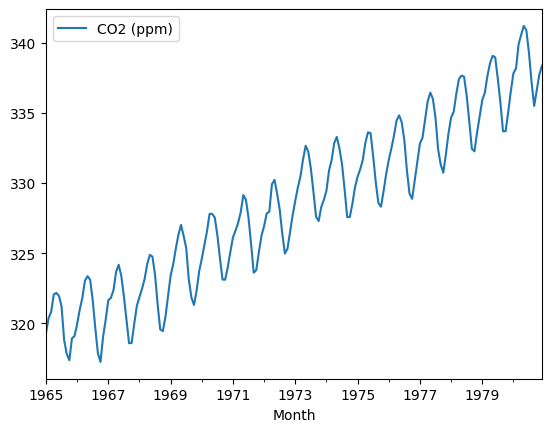

In [ ]:
# load dataset

def load_dataset(file_path):
  series_data = pd.read_csv(file_path, header=0, parse_dates=True, index_col=0)
  return series_data

def parser(X):
  return datetime.strptime(X, '%Y-%m')

series_data = load_dataset("/content/data.csv")
print(series_data.head())

# visualize dataset
series_data.plot()

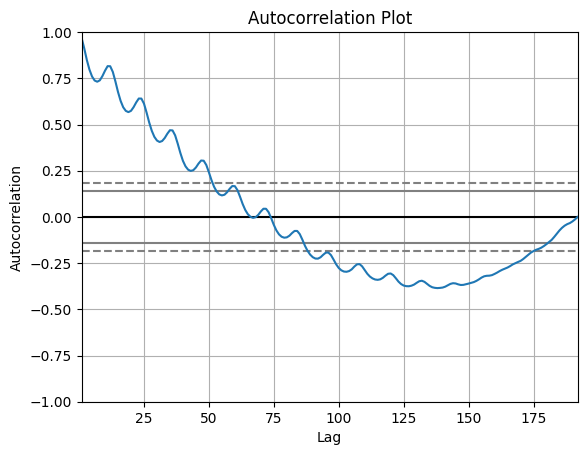

In [ ]:
# autocorrelation plot (tool for checking randomness in a data set)

plt.title("Autocorrelation Plot")
xlabel = pd.plotting.autocorrelation_plot(series_data)
xlabel.plot()

plt.show()

In [ ]:
np.asarray(series_data)

array([[319.32],
       [320.36],
       [320.82],
       [322.06],
       [322.17],
       [321.95],
       [321.2 ],
       [318.81],
       [317.82],
       [317.37],
       [318.93],
       [319.09],
       [319.94],
       [320.98],
       [321.81],
       [323.03],
       [323.36],
       [323.11],
       [321.65],
       [319.64],
       [317.86],
       [317.25],
       [319.06],
       [320.26],
       [321.65],
       [321.81],
       [322.36],
       [323.67],
       [324.17],
       [323.39],
       [321.93],
       [320.29],
       [318.58],
       [318.6 ],
       [319.98],
       [321.25],
       [321.88],
       [322.47],
       [323.17],
       [324.23],
       [324.88],
       [324.75],
       [323.47],
       [321.34],
       [319.56],
       [319.45],
       [320.45],
       [321.92],
       [323.4 ],
       [324.21],
       [325.33],
       [326.31],
       [327.01],
       [326.24],
       [325.37],
       [323.12],
       [321.85],
       [321.31],
       [322.31

***ANALYSIS:***


After loading the dataset containing CO2 levels, I used Python's pandas and matplotlib libraries to visualize the data and plot an autocorrelation graph. The dataset spans from 1965 to present, showing an upward trend in CO2 levels over time. The autocorrelation plot helps identify any patterns or correlations within the data. By observing the graph, we can see if there's any significant correlation between CO2 levels at different time lags.

# Fit an ARIMA Model

In [ ]:
# Fit an ARIMA Model (baseline model order = (1,1,1))
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(series_data, order=(1,1,1))

fit_model = model.fit()

In [ ]:
# summary of fit model
print(fit_model.summary())

                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -225.819
Date:                Fri, 03 May 2024   AIC                            457.638
Time:                        04:22:34   BIC                            467.395
Sample:                    01-01-1965   HQIC                           461.590
                         - 12-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5590      0.087      6.441      0.000       0.389       0.729
ma.L1          0.3307      0.092      3.613      0.000       0.151       0.510
sigma2         0.6202      0.071      8.704      0.0

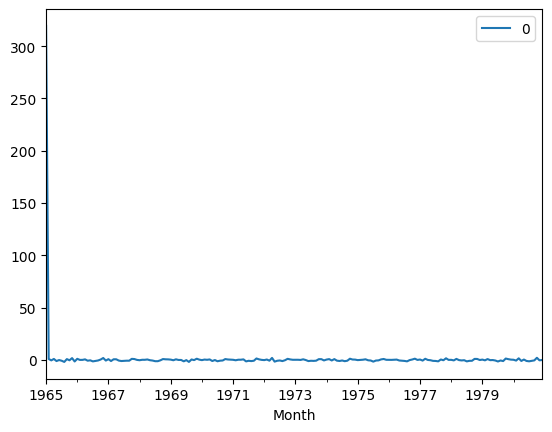

In [ ]:
# line plot of residuals

# Get the residuals
residuals = pd.DataFrame(fit_model.resid)

# Plot the residuals
residuals.plot()
plt.show()

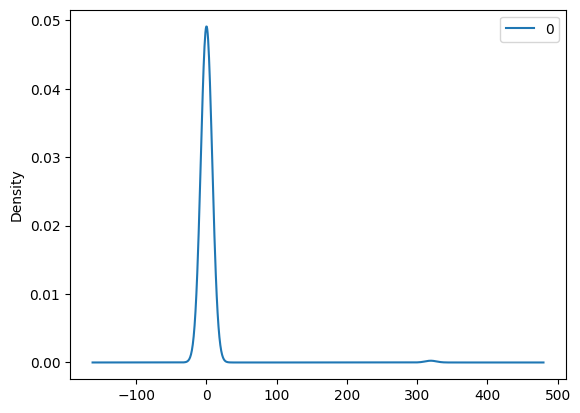

In [ ]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

In [ ]:
# summary stats of residuals
print(residuals.describe())

                0
count  192.000000
mean     1.698162
std     23.055889
min     -1.760398
25%     -0.571139
50%      0.034938
75%      0.566208
max    319.320000


# Improve the ARIMA Model

In [ ]:
# Improve the ARIMA Model (baseline model order = (2,1,2))
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(series_data, order=(2,1,2))

fit_model = model.fit()

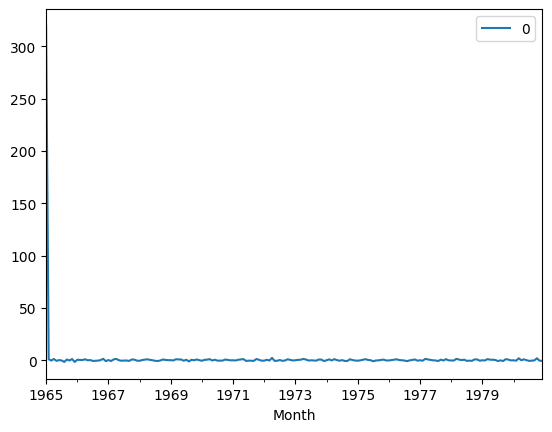

In [ ]:
# line plot of residuals

# Get the residuals
residuals = pd.DataFrame(fit_model.resid)

# Plot the residuals
residuals.plot()
plt.show()

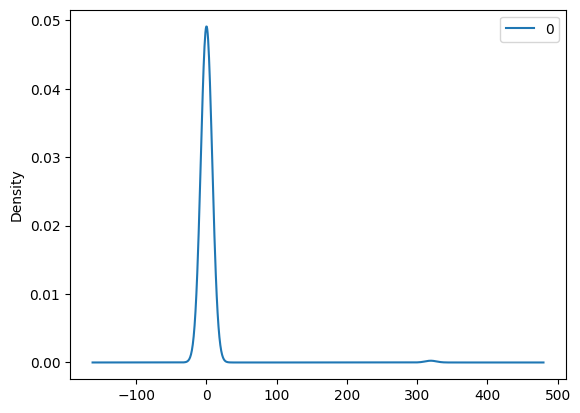

In [ ]:
# density plot of residuals
from matplotlib import pyplot

residuals.plot(kind='kde')
pyplot.show()

In [ ]:
# summary stats of residuals
print(residuals.describe())

                0
count  192.000000
mean     1.825421
std     23.041954
min     -1.552917
25%     -0.321482
50%      0.060382
75%      0.631475
max    319.320000


***ANALYSIS:***

Based on the ARIMA model and its improve model, it seems like the model is underfitting the data. The summary stats of the residuals show a mean close to zero but a high standard deviation, indicating significant variability not captured by the model. The line plot of the residuals also suggests inconsistency between the model predictions and the actual data points. Additionally, the density plot highlights the spread of residuals, indicating potential inadequacy in capturing the underlying patterns of the time series data. This suggests that the chosen ARIMA(1,1,1) model might not be sufficient to effectively model the complexity of the CO2 ppm data, and further exploration of alternative models or parameter tuning may be necessary to improve its performance.

# Print the model summary

In [ ]:
# summary of fit model
print(fit_model.summary())

                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -190.433
Date:                Fri, 03 May 2024   AIC                            390.866
Time:                        04:58:26   BIC                            407.128
Sample:                    01-01-1965   HQIC                           397.453
                         - 12-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5418      0.059     25.914      0.000       1.425       1.658
ar.L2         -0.8373      0.069    -12.158      0.000      -0.972      -0.702
ma.L1         -0.8778      0.105     -8.397      0.0

***ANALYSIS:***


The code reveals a SARIMAX model fitted to CO2 ppm data from 1965 to 1980. The model suggests an ARIMA(2, 1, 2) structure, indicating a seasonal component. Coefficients for autoregressive and moving average terms show significance, suggesting the model's capability in capturing the data's dynamics. However, the second moving average term might not be statistically significant, warranting further investigation for model refinement.

# Make a forecast (steps=10)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Split into train and test sets
train_size = int(len(series_data) * 0.75)
train_data, test_data = series_data[0:train_size], series_data[train_size:]

# Define the start and end indices for predictions
start = len(train_data)
end=len(train_data)+len(test_data)-1

# Define the model
model = ARIMA(train_data, order = (9,2,0))

# Fit the model
results = model.fit()

# Make predictions on the test data
predictions = results.predict(start=start, end=end, dynamic=False, type='levels')

# Make forecasts for future time steps
forecast = results.predict(len(series_data), len(series_data)+10, type = 'levels')

In [ ]:
print("Forecast (steps = 10)")
print(forecast)

Forecast (steps = 10)
1981-01-01    338.829450
1981-02-01    339.410077
1981-03-01    339.846441
1981-04-01    339.951027
1981-05-01    339.624439
1981-06-01    338.996781
1981-07-01    338.387871
1981-08-01    338.097810
1981-09-01    338.219246
1981-10-01    338.635268
1981-11-01    339.168786
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
print("MSE: ", mean_squared_error(test_data, predictions))
print("RMSE: ", sqrt(mean_squared_error(test_data, predictions)))

MSE:  1.1498843083979555
RMSE:  1.0723265866320557


***ANALYSIS:***

In this part, based on the ARIMA model, I trained it using 75% of the data and tested it on the remaining 25%. The forecast for the next 10 time steps suggests a slight fluctuation in the values, with an average MSE of 1.15 and RMSE of 1.07, indicating a moderate level of prediction error.

# Plot the forecast

In [ ]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

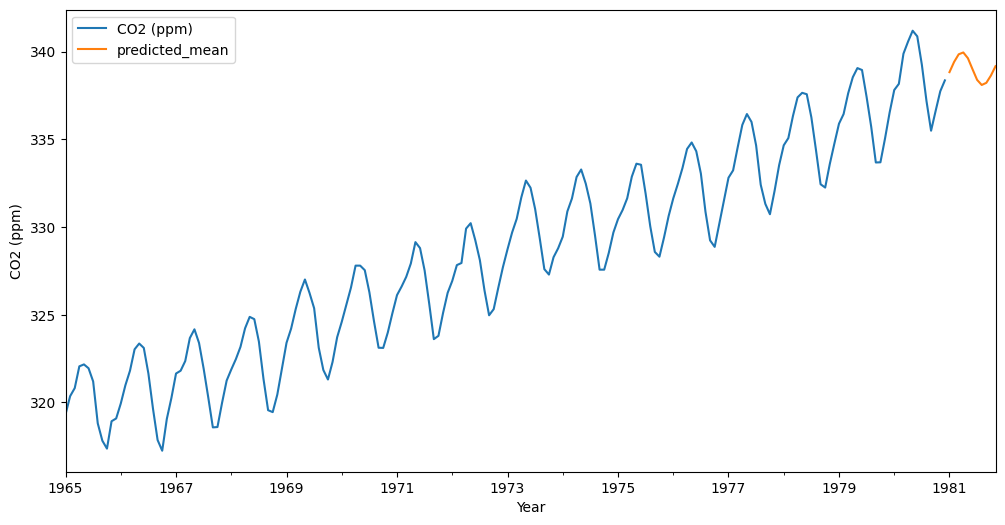

In [ ]:
ylabel='CO2 (ppm)'
xlabel='Year'

ax = series_data.plot(legend=True,figsize=(12,6))
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

***ANALYSIS:***

In plotting the forecast, I see it's plotting CO2 levels over the years with a forecast. The plot shows a clear upward trend in CO2 levels, and the forecast suggests this trend will continue. With the x-axis labeled as 'Year' and the y-axis as 'CO2 (ppm)', it's easy to see the progression over time.

# Perform a grid search

In [ ]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(series_data, arima_order):
  train_size = int(len(series_data) * 0.75)
  train_data, test_data = series_data[0:train_size], series_data[train_size:]

  # Define the start and end indices for predictions
  start = len(train_data)
  end = len(train_data) + len(test_data) - 1

  # Define the model
  model = ARIMA(train_data, order= arima_order)

  # Fit the model
  results = model.fit()

  # Make forecasts for future time steps
  forecast = results.predict(len(series_data), len(series_data)+10, type = 'levels')

  # Make predictions on the test data
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')

  # Calculate MSE
  mse = mean_squared_error(test_data, predictions)

  return mse

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
import warnings
warnings.filterwarnings("ignore")


def evaluate_models(series_data, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(series_data, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA=%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
# evaluate parameters
p_values = range(0,11)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series_data.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=107.199
ARIMA(0, 0, 1) MSE=106.494
ARIMA(0, 0, 2) MSE=106.042
ARIMA(0, 0, 3) MSE=105.846
ARIMA(0, 1, 0) MSE=26.634
ARIMA(0, 1, 1) MSE=23.951
ARIMA(0, 1, 2) MSE=20.025
ARIMA(0, 1, 3) MSE=18.380
ARIMA(0, 2, 0) MSE=1059.451
ARIMA(0, 2, 1) MSE=942.369
ARIMA(0, 2, 2) MSE=998.307
ARIMA(0, 2, 3) MSE=6.025
ARIMA(0, 3, 0) MSE=1432.028
ARIMA(0, 3, 1) MSE=1128.208
ARIMA(0, 3, 2) MSE=945.481
ARIMA(0, 3, 3) MSE=1022.852
ARIMA(1, 0, 0) MSE=62.368
ARIMA(1, 0, 1) MSE=72.465
ARIMA(1, 0, 2) MSE=81.394
ARIMA(1, 0, 3) MSE=91.863
ARIMA(1, 1, 0) MSE=8.619
ARIMA(1, 1, 1) MSE=13.928
ARIMA(1, 1, 2) MSE=14.918
ARIMA(1, 1, 3) MSE=18.170
ARIMA(1, 2, 0) MSE=1065.125
ARIMA(1, 2, 1) MSE=1008.356
ARIMA(1, 2, 2) MSE=4.099
ARIMA(1, 2, 3) MSE=4.275
ARIMA(1, 3, 0) MSE=75819.084
ARIMA(1, 3, 1) MSE=1087.634
ARIMA(1, 3, 2) MSE=1026.289
ARIMA(1, 3, 3) MSE=1016.551
ARIMA(2, 0, 0) MSE=97.612
ARIMA(2, 0, 1) MSE=95.559
ARIMA(2, 0, 2) MSE=94.688
ARIMA(2, 0, 3) MSE=36.992
ARIMA(2, 1, 0) MSE=23.998
ARIMA(2, 1, 1)

***ANALYSIS:***

After analyzing the code, it seems we're using an ARIMA model to forecast time series data. The evaluate_arima_model function assesses the model's performance based on given order (p,d,q). Then, evaluate_models function iterates through combinations of p, d, and q values to find the best configuration by minimizing Mean Squared Error (MSE). Finally, the result indicates that the best ARIMA model has parameters (9, 2, 0) with an MSE of 1.150.

# SUPPLEMETARY

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -uq "/content/drive/MyDrive/Colab Notebooks/dataset_temperature.zip" -d "/content/drive/MyDrive/Colab Notebooks"

***ANALYSIS:***

Upon the code I've imported, it seems like it is working with time-series data, specifically temperature data, which is stored in a dataset that's being extracted from a zip file. Libraries like pandas, numpy, matplotlib, and seaborn are imported, indicating that we'll likely perform data manipulation, visualization, and possibly modeling. The ARIMA model from statsmodels.tsa.arima is imported, suggesting that we might be exploring time-series forecasting. Additionally, the use of sklearn's mean_squared_error indicates that we'll evaluate model performance. The Google Drive mount and unzip commands suggest that the dataset is stored in Google Drive and is being extracted for analysis.

LOAD TIME SERIES TEMPERATURE DATASET

In [ ]:
 # load temperature dataset

def temp_dataset(file_path):
  temp_data = pd.read_csv(file_path, header=0, parse_dates=True, index_col=0,)
  return temp_data

def parser(x):
  return datetime.strptime(x, '%Y-%m')

temp_data = temp_dataset("/content/drive/MyDrive/Colab Notebooks/dataset_temperature.csv")
print(temp_data.head())

        Mean monthly temperature
Month                           
1907-01                     33.3
1907-02                       46
1907-03                       43
1907-04                       55
1907-05                     51.8


***ANALYSIS:***

In loading this dataset, First, I created a function called temp_dataset that loads a temperature dataset from a CSV file located at the given file path. I specified that the CSV file has a header and dates to be parsed. Then, I defined another function named parser to convert date strings into datetime objects with the format '%Y-%m'. After that, I invoked the temp_dataset function with the file path "/content/drive/MyDrive/Colab Notebooks/dataset_temperature.csv". Finally, I printed the first few rows of the loaded temperature dataset using the head() function to display the mean monthly temperature along with their respective months, starting from January 1907.

PREPROCESSING OF DATA

In [ ]:
print(temp_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 794 entries, 1907-01 to Mean monthly temperature
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mean monthly temperature  793 non-null    object
dtypes: object(1)
memory usage: 12.4+ KB
None


***ANALYSIS:***

Based on the info provided, it shows that the data type of the 'Mean monthly temperature' column is an object, indicating it might contain non-numeric values. The error message suggests that there's a string value in the data that can't be converted to a float, causing issues with data processing. Preprocessing the data is necessary to handle these non-numeric values, such as dropping some values entirely. After preprocessing, I'll recheck the data to ensure all values are numeric, which should resolve the errors and allow for smooth analysis and plotting.

In [ ]:
# mumber of rows to remove
n = 2

# removing last 2 rows
temp_data = temp_data.iloc[:-n]

# convert index to datetime
temp_data.index = pd.to_datetime(temp_data.index)

print(temp_data)

           Mean monthly temperature
Month                              
1907-01-01                     33.3
1907-02-01                       46
1907-03-01                       43
1907-04-01                       55
1907-05-01                     51.8
...                             ...
1972-08-01                     75.6
1972-09-01                     64.1
1972-10-01                     51.7
1972-11-01                     40.3
1972-12-01                     30.3

[792 rows x 1 columns]


In [ ]:
# convert (object) datatype to float64
temp_data = temp_data.astype('float64')

# specify frequency as 'MS' (Month Start)
temp_data.index.freq = 'MS'

***ANALYSIS:***

Based on my observation, I drop the last two rows from a dataframe since the value error includes: "could not convert string to float: ' 1907 ? 1972'", After removing that it ensures that it probably clean up the data. Then, I converted the index of the dataframe to datetime format, which is handy for time series data. After printing, it seems it deals with the mean monthly temperatures ranging from 1907 to 1972. Next, I converted the data type of the dataframe to float64, which is a common numeric format. Finally, I specified the frequency of the index as 'MS' for Month Start, which is crucial for time series analysis.

VISUALIZE THE TIME SERIES

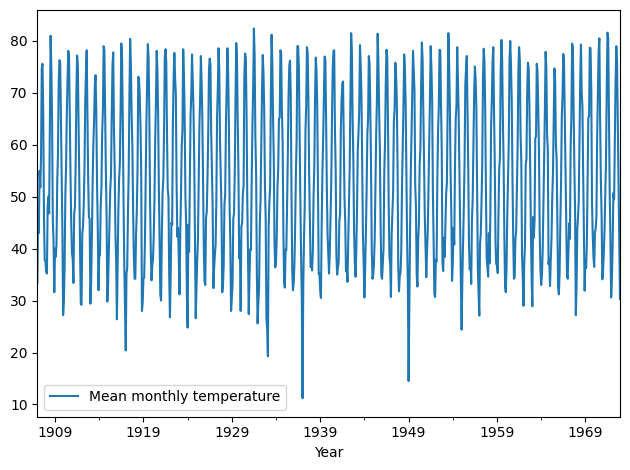

In [ ]:
# visualize dataset
temp_data.plot()
plt.xlabel('Year')
plt.ylabel = 'Mean Monthly Temperature'
plt.tight_layout()
plt.show()

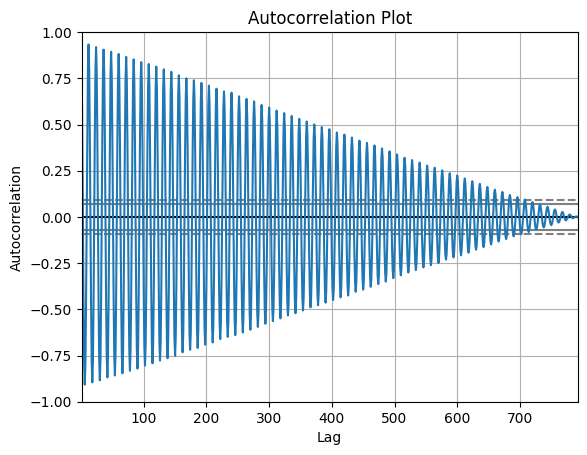

In [ ]:
# using autocorrelation plot (tool for checking randomness in temperature dataset)

plt.title("Autocorrelation Plot")
xlabel = pd.plotting.autocorrelation_plot(temp_data)
xlabel.plot()

plt.show()

***ANALYSIS:***

From the result, it seems like it plotting some temperature data over the years and then checking for randomness using autocorrelation. The temperature plot shows fluctuations over time, maybe indicating some seasonal patterns. The autocorrelation plot helps me understand if there's any pattern in the data repeating at certain intervals. Based on the slight fluctuations in both plots, it seems the dataset might need minor adjustments for better accuracy, but it's overall looking alright.

Fit an ARIMA Model (baseline model order = (1,1,1))

In [ ]:
# Fit an ARIMA Model (baseline model order = (1,1,1))

model = ARIMA(temp_data, order=(1,1,1))

fit_model = model.fit()

In [ ]:
# summary of fit model
print(fit_model.summary())

                                  SARIMAX Results                                   
Dep. Variable:     Mean monthly temperature   No. Observations:                  792
Model:                       ARIMA(1, 1, 1)   Log Likelihood               -2773.596
Date:                      Sat, 04 May 2024   AIC                           5553.192
Time:                              12:00:19   BIC                           5567.212
Sample:                          01-01-1907   HQIC                          5558.581
                               - 12-01-1972                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5458      0.060      9.104      0.000       0.428       0.663
ma.L1         -0.0333      0.072     -0.462      0.644      -0.174       0.108
sigm

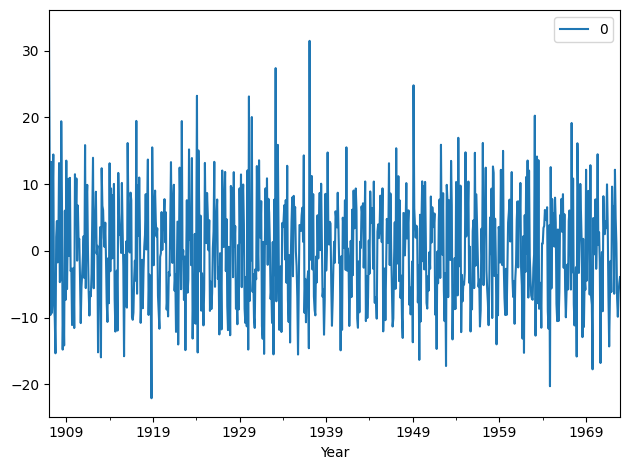

In [ ]:
# line plot of residuals
residuals = pd.DataFrame(fit_model.resid)

# Plot the residuals
residuals.plot()
plt.xlabel('Year')
plt.tight_layout()
plt.show()

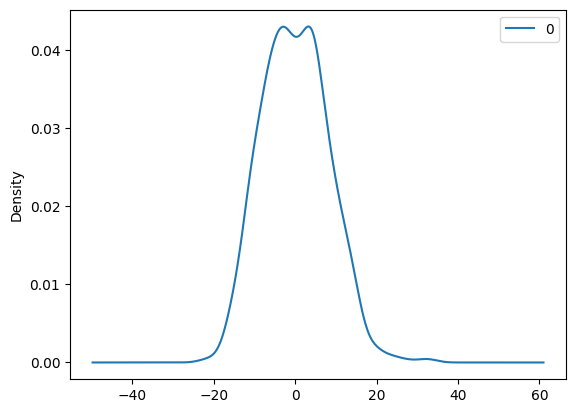

In [ ]:
# density plot of residuals

residuals.plot(kind='kde')
pyplot.show()

In [ ]:
# summary stats of residuals
print(residuals.describe())

                0
count  792.000000
mean     0.033157
std      8.152946
min    -22.090284
25%     -5.966691
50%     -0.197062
75%      5.394914
max     33.300000


***ANALYSIS:***

After fitting an ARIMA model with order (1,1,1) to the temperature data, I analyzed the summary and plotted the residuals. The summary provided insight into the model's performance, including coefficients and statistical metrics. The line plot of residuals displayed patterns or trends that might indicate inadequacies in the model's fit. Additionally, the density plot of residuals suggested non-normality, indicating potential areas for improvement in the model's accuracy. Overall, based on these observations, it seems like adjustments may be needed to better fit the ARIMA model to the data.

Improve the ARIMA Model

In [ ]:
# improve and fit an ARIMA Model (baseline model order = (6,0,2))

model = ARIMA(temp_data, order=(6,0,2))

fit_model = model.fit()

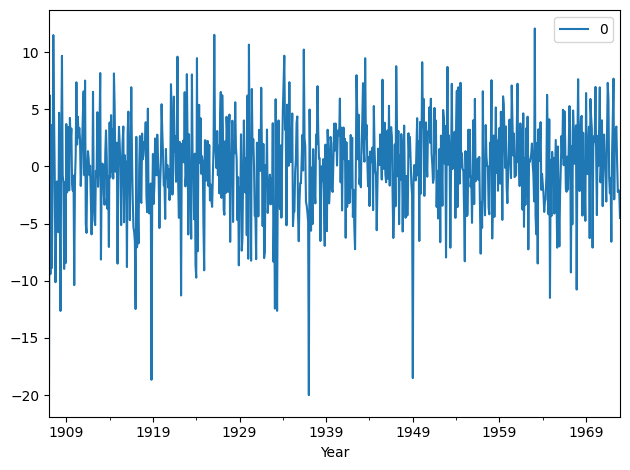

In [ ]:
# line plot of residuals
residuals = pd.DataFrame(fit_model.resid)

# Plot the residuals
residuals.plot()
plt.xlabel('Year')
plt.tight_layout()
plt.show()

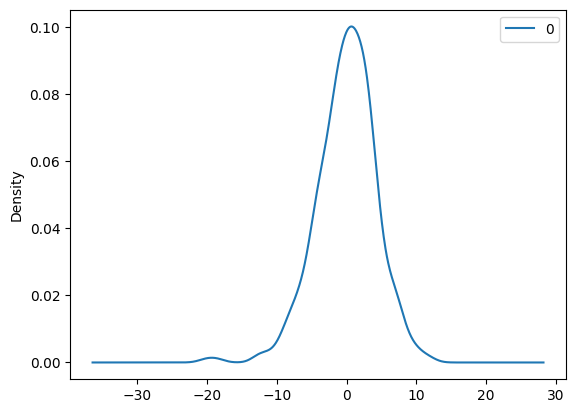

In [ ]:
# density plot of residuals

residuals.plot(kind='kde')
pyplot.show()

***ANALYSIS:***


Based on the code and the resulting graph, it seems like we're improving the ARIMA model by adjusting its order to (6,0,2). When I plotted the residuals, the graph looked better compared to the initial model. This suggests that the changes made have enhanced the model's fit to the data. It's a simple tweak, but it seems to be making a positive difference in how well our model captures the temperature data.

Print the model summary

In [ ]:
# summary of fit model
print(fit_model.summary())

                                  SARIMAX Results                                   
Dep. Variable:     Mean monthly temperature   No. Observations:                  792
Model:                       ARIMA(6, 0, 2)   Log Likelihood               -2262.004
Date:                      Sat, 04 May 2024   AIC                           4544.008
Time:                              12:24:21   BIC                           4590.754
Sample:                          01-01-1907   HQIC                          4561.974
                               - 12-01-1972                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.5743      0.143    374.141      0.000      53.294      53.855
ar.L1          1.8977      0.041     46.662      0.000       1.818       1.977
ar.L

MAKE A FORECAST  (STEPS = 10)

In [ ]:
# Split into train and test sets
train_size = int(len(temp_data) * 0.75)
train_data, test_data = temp_data[0:train_size], temp_data[train_size:]

# Define the start and end indices for predictions
start = len(train_data)
end=len(train_data)+len(test_data)-1

# Define the model
model = ARIMA(train_data, order = (6,0,2))

# Fit the model
results = model.fit()

# Make predictions on the test data
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')

# Make forecasts for future time steps
forecast = results.predict(len(temp_data), len(temp_data)+10, typ = 'levels')

print("Forecast (steps = 10)")
print(forecast)

Forecast (steps = 10)
1973-01-01    42.561490
1973-02-01    42.640695
1973-03-01    45.654069
1973-04-01    50.780808
1973-05-01    56.641746
1973-06-01    61.670317
1973-07-01    64.531222
1973-08-01    64.474950
1973-09-01    61.534030
1973-10-01    56.509657
1973-11-01    50.753533
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
print("MSE: ", mean_squared_error(test_data, predictions))
print("RMSE: ", sqrt(mean_squared_error(test_data, predictions)))

MSE:  37.19239925085286
RMSE:  6.098557145001829


***ANALYSIS:***

 In making a forecast, I split the data into training and testing sets, with 75% for training. Then, I used an ARIMA model with order (6,0,2) to fit the training data and made predictions on the test data. Additionally, I forecasted future values for 10 time steps beyond the data. The forecasted values suggest an increasing trend over time. The mean squared error (MSE) and root mean squared error (RMSE) between the test data and predictions were computed, with MSE at 37.19 and RMSE at 6.10, indicating the model's performance in predicting the test data.

Plot the forecast

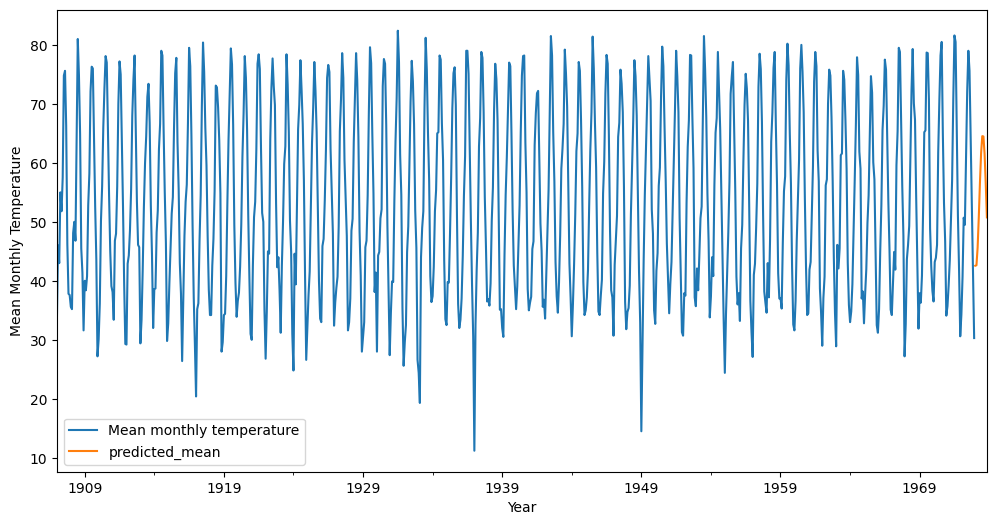

In [ ]:
ylabel = 'Mean Monthly Temperature'
xlabel='Year'

ax = temp_data.plot(legend=True,figsize=(12,6))
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

***ANALYSIS:***

The graph shows up with the mean monthly temperature on the y-axis and the year on the x-axis. I noticed the addition of a legend and the forecast plot, which gives a glimpse of future trends. The graph appears more polished and easier to interpret with the adjustments made. Overall, it seems like a solid improvement from the previous.

Perform a grid search

In [ ]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(temp_data, arima_order):
  train_size = int(len(temp_data) * 0.75)
  train_data, test_data = temp_data[0:train_size], temp_data[train_size:]

  # Define the start and end indices for predictions
  start = len(train_data)
  end = len(train_data) + len(test_data) - 1

  # Define the model
  model = ARIMA(train_data, order= arima_order)

  # Fit the model
  results = model.fit()

  # Make forecasts for future time steps
  forecast = results.predict(len(temp_data), len(temp_data)+10, type = 'levels')

  # Make predictions on the test data
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')

  # Calculate MSE
  mse = mean_squared_error(test_data, predictions)

  return mse

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
import warnings
warnings.filterwarnings("ignore")


def evaluate_models(temp_data, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(temp_data, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA=%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
# evaluate parameters
p_values = range(0,11)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(temp_data.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=244.680
ARIMA(0, 0, 1) MSE=243.522
ARIMA(0, 0, 2) MSE=241.414
ARIMA(0, 0, 3) MSE=240.950
ARIMA(0, 1, 0) MSE=495.038
ARIMA(0, 1, 1) MSE=563.035
ARIMA(0, 1, 2) MSE=762.177
ARIMA(0, 1, 3) MSE=241.417
ARIMA(0, 2, 0) MSE=1244065.976
ARIMA(0, 2, 1) MSE=1228064.280
ARIMA(0, 2, 2) MSE=1375959.214
ARIMA(0, 2, 3) MSE=1226.256
ARIMA(0, 3, 0) MSE=75530369.710
ARIMA(0, 3, 1) MSE=1146838.733
ARIMA(0, 3, 2) MSE=1228565.660
ARIMA(0, 3, 3) MSE=1377435.736
ARIMA(1, 0, 0) MSE=244.502
ARIMA(1, 0, 1) MSE=242.878
ARIMA(1, 0, 2) MSE=242.032
ARIMA(1, 0, 3) MSE=241.498
ARIMA(1, 1, 0) MSE=927.784
ARIMA(1, 1, 1) MSE=967.960
ARIMA(1, 1, 2) MSE=242.927
ARIMA(1, 1, 3) MSE=242.089
ARIMA(1, 2, 0) MSE=1304343.983
ARIMA(1, 2, 1) MSE=1337791.293
ARIMA(1, 2, 2) MSE=1669.403
ARIMA(1, 2, 3) MSE=1745.212
ARIMA(1, 3, 0) MSE=348687748.241
ARIMA(1, 3, 1) MSE=1318901.869
ARIMA(1, 3, 2) MSE=1359081.389
ARIMA(1, 3, 3) MSE=1237604.102
ARIMA(2, 0, 0) MSE=235.314
ARIMA(2, 0, 1) MSE=184.648
ARIMA(2, 0, 2) MSE=16.30

***ANALYSIS:***

Lastly, I wrote functions to evaluate ARIMA models with different orders using a 75/25 train-test split. In evaluate_models, I loop through various combinations of p, d, and q values, fitting ARIMA models and calculating Mean Squared Error (MSE) for each combination. The ARIMA order with the lowest MSE is considered the best. The result indicates that the best ARIMA model has parameters (p=3, d=0, q=3) with an MSE of 15.662. This suggests that this ARIMA model provides a relatively accurate forecast compared to previous tested.

# CONCLUSION / LEARNINGS

After analyzing the codes for implementing a time series ARIMA model, I've concluded that it's crucial to understand the data thoroughly before diving into modeling. Cleaning and preprocessing data should always be part, but it's worth it. Additionally, tuning the model parameters like the order of differencing and the ARIMA requires some trial and error but ultimately rewarding. Lastly, I learned that to validate the model properly to ensure its accuracy and reliability. Furthermore, implementing the ARIMA model taught me the importance of patience, experimentation, and attention to detail in data analysis and modeling.